<a href="https://colab.research.google.com/github/KRANCHejb-01-2827/Crunchplp/blob/main/climate_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()



Saving CO2_Emissions.csv to CO2_Emissions (1).csv


In [ ]:
import pandas as pd
data = pd.read_csv("CO2_Emissions.csv")
print(data.head())
print(data.columns)



    Make       Model Vehicle Class  Engine Size(L)  Cylinders Transmission  \
0  ACURA         ILX       COMPACT             2.0          4          AS5   
1  ACURA         ILX       COMPACT             2.4          4           M6   
2  ACURA  ILX HYBRID       COMPACT             1.5          4          AV7   
3  ACURA     MDX 4WD   SUV - SMALL             3.5          6          AS6   
4  ACURA     RDX AWD   SUV - SMALL             3.5          6          AS6   

  Fuel Type  Fuel Consumption City (L/100 km)  \
0         Z                               9.9   
1         Z                              11.2   
2         Z                               6.0   
3         Z                              12.7   
4         Z                              12.1   

   Fuel Consumption Hwy (L/100 km)  Fuel Consumption Comb (L/100 km)  \
0                              6.7                               8.5   
1                              7.7                               9.6   
2                   

In [ ]:
print(data.columns)


Index(['Make', 'Model', 'Vehicle Class', 'Engine Size(L)', 'Cylinders',
       'Transmission', 'Fuel Type', 'Fuel Consumption City (L/100 km)',
       'Fuel Consumption Hwy (L/100 km)', 'Fuel Consumption Comb (L/100 km)',
       'Fuel Consumption Comb (mpg)', 'CO2 Emissions(g/km)'],
      dtype='object')


✅ Dataset Loaded Successfully!
    Make       Model Vehicle Class  Engine Size(L)  Cylinders Transmission  \
0  ACURA         ILX       COMPACT             2.0          4          AS5   
1  ACURA         ILX       COMPACT             2.4          4           M6   
2  ACURA  ILX HYBRID       COMPACT             1.5          4          AV7   
3  ACURA     MDX 4WD   SUV - SMALL             3.5          6          AS6   
4  ACURA     RDX AWD   SUV - SMALL             3.5          6          AS6   

  Fuel Type  Fuel Consumption City (L/100 km)  \
0         Z                               9.9   
1         Z                              11.2   
2         Z                               6.0   
3         Z                              12.7   
4         Z                              12.1   

   Fuel Consumption Hwy (L/100 km)  Fuel Consumption Comb (L/100 km)  \
0                              6.7                               8.5   
1                              7.7                           

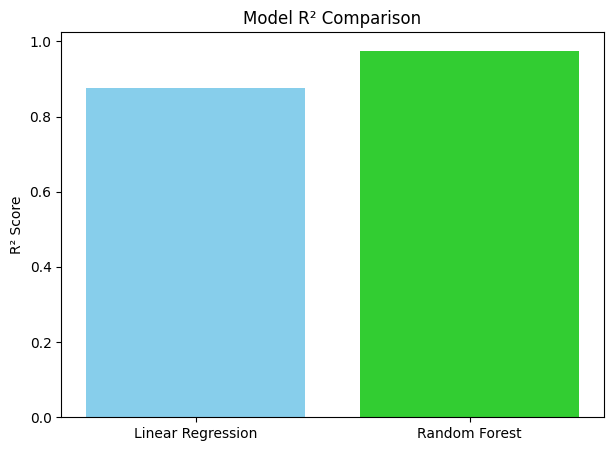

/tmp/ipython-input-2205928800.py:89: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importance, palette='viridis')


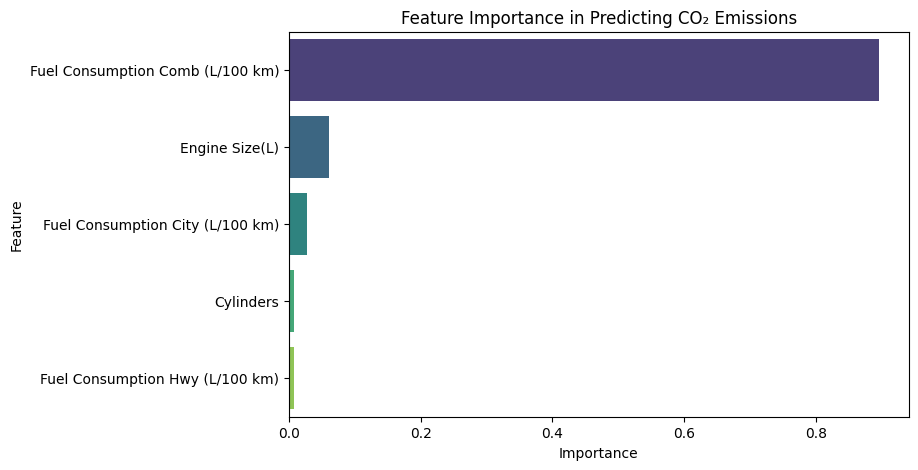


🚗 Enter vehicle details to predict CO₂ emissions:
Enter Engine Size (L): 2.0
Enter Number of Cylinders: 4
Enter City Fuel Consumption (L/100km): 10
Enter Highway Fuel Consumption (L/100km): 7
Enter Combined Fuel Consumption (L/100km): 8.5

🌿 Estimated CO₂ Emissions: 197.43 g/km

✅ Model training complete and saved successfully!


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [ ]:
# -----------------------------------------------
# 🌍 SDG 13: Climate Action Project
# Predicting Vehicle CO2 Emissions using ML Models
# -----------------------------------------------

# Step 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import joblib

# Step 2: Load Dataset
data = pd.read_csv("/content/CO2_Emissions.csv")
print("✅ Dataset Loaded Successfully!")
print(data.head())

# Step 3: Data Cleaning
print("\n🧹 Checking for missing values...")
print(data.isnull().sum())

# Drop rows with missing values (or you could fill them with mean)
data = data.dropna()

# Step 4: Select Features and Target
features = ['Engine Size(L)', 'Cylinders',
            'Fuel Consumption City (L/100 km)',
            'Fuel Consumption Hwy (L/100 km)',
            'Fuel Consumption Comb (L/100 km)']
target = 'CO2 Emissions(g/km)'

X = data[features]
y = data[target]

# Step 5: Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 6: Split Data into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

# Step 7: Train Two Models — Linear Regression & Random Forest
lr_model = LinearRegression()
rf_model = RandomForestRegressor(n_estimators=200, random_state=42)

lr_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)

# Step 8: Make Predictions
lr_pred = lr_model.predict(X_test)
rf_pred = rf_model.predict(X_test)

# Step 9: Evaluate Models
def evaluate_model(name, y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    print(f"\n📊 {name} Performance:")
    print(f"MAE: {mae:.2f}")
    print(f"MSE: {mse:.2f}")
    print(f"R²: {r2:.4f}")
    return r2

r2_lr = evaluate_model("Linear Regression", y_test, lr_pred)
r2_rf = evaluate_model("Random Forest", y_test, rf_pred)

# Step 10: Compare Models Visually
plt.figure(figsize=(7,5))
plt.bar(["Linear Regression", "Random Forest"], [r2_lr, r2_rf], color=["skyblue","limegreen"])
plt.title("Model R² Comparison")
plt.ylabel("R² Score")
plt.show()

# Step 11: Feature Importance (from Random Forest)
importance = rf_model.feature_importances_
feature_importance = pd.DataFrame({
    'Feature': features,
    'Importance': importance
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(8,5))
sns.barplot(x='Importance', y='Feature', data=feature_importance, palette='viridis')
plt.title("Feature Importance in Predicting CO₂ Emissions")
plt.show()

# Step 12: User Input Prediction System
print("\n🚗 Enter vehicle details to predict CO₂ emissions:")
engine_size = float(input("Enter Engine Size (L): "))
cylinders = int(input("Enter Number of Cylinders: "))
city_consumption = float(input("Enter City Fuel Consumption (L/100km): "))
highway_consumption = float(input("Enter Highway Fuel Consumption (L/100km): "))
combined_consumption = float(input("Enter Combined Fuel Consumption (L/100km): "))

# Prepare input data
user_data = np.array([[engine_size, cylinders, city_consumption, highway_consumption, combined_consumption]])
user_data_scaled = scaler.transform(user_data)

# Predict using Random Forest (better model)
user_prediction = rf_model.predict(user_data_scaled)
print(f"\n🌿 Estimated CO₂ Emissions: {user_prediction[0]:.2f} g/km")

# Step 13: Save the Best Model
joblib.dump(rf_model, "co2_emission_predictor.pkl")
joblib.dump(scaler, "scaler.pkl")

print("\n✅ Model training complete and saved successfully!")


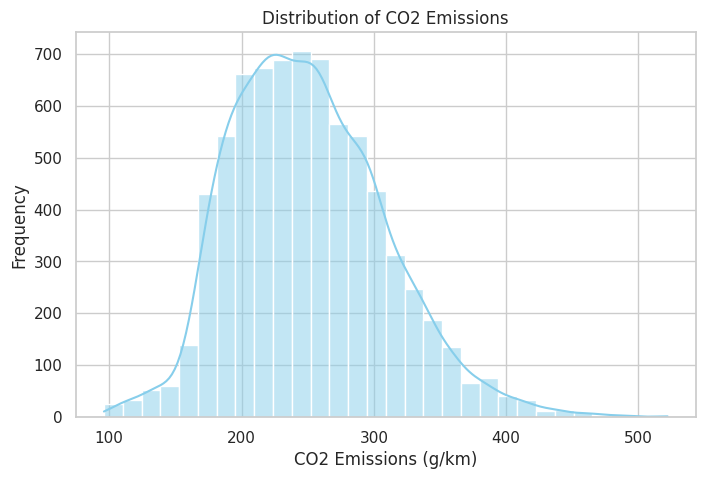

/tmp/ipython-input-1332260817.py:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importance, palette='viridis')


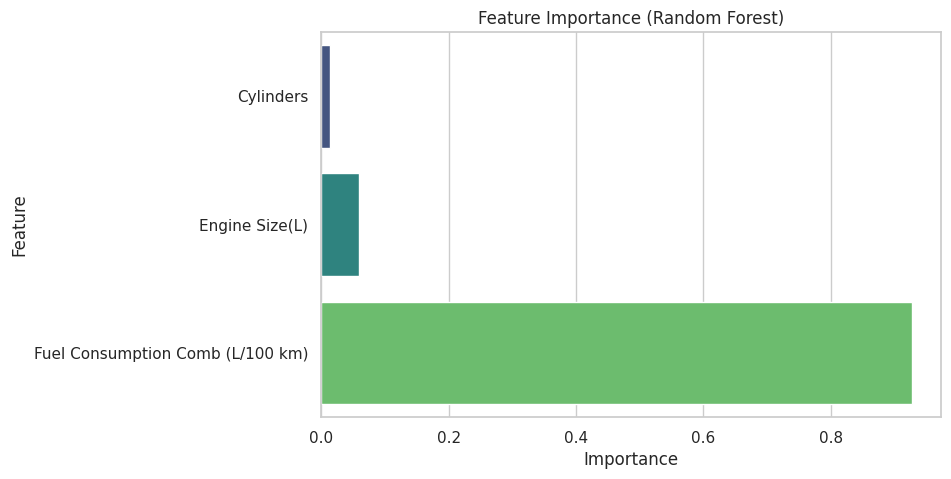

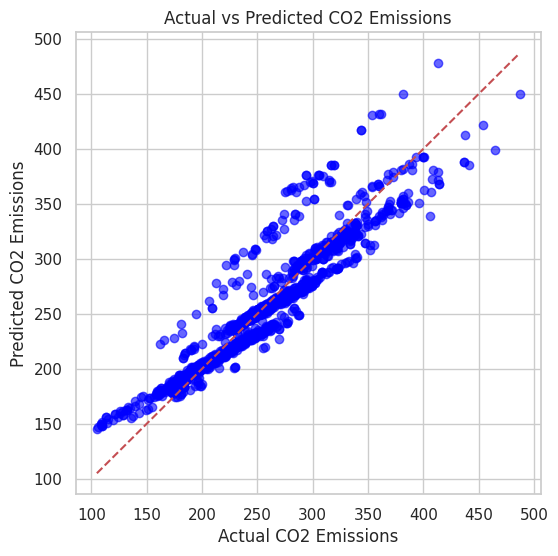

/tmp/ipython-input-1332260817.py:68: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Fuel Type', y='CO2 Emissions(g/km)', data=avg_co2_fuel, palette='coolwarm')


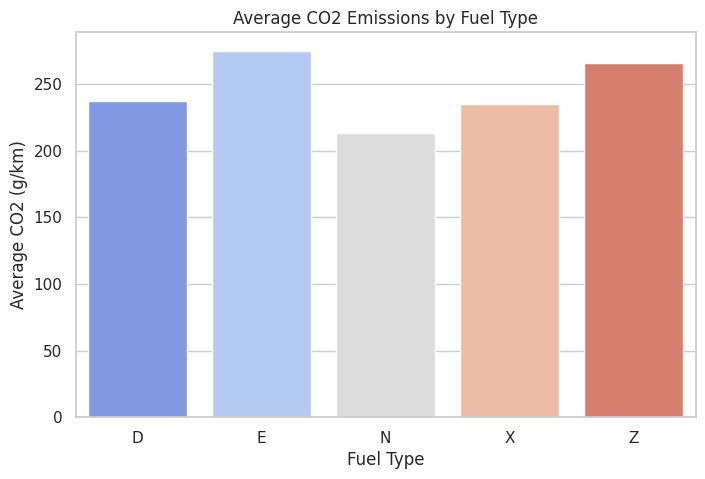

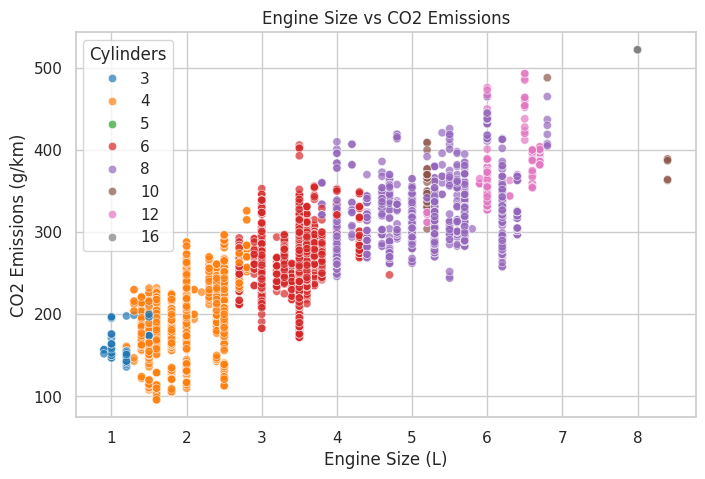

✅ All visuals generated and saved as PNG files!


In [ ]:
# -------------------------------
# SDG 13: Climate Action Visualizations
# -------------------------------

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load dataset
data = pd.read_csv("/content/CO2_Emissions.csv")

# Set Seaborn style
sns.set(style="whitegrid")

# 1️⃣ CO2 Emissions Distribution
plt.figure(figsize=(8,5))
sns.histplot(data['CO2 Emissions(g/km)'], bins=30, color='skyblue', kde=True)
plt.title("Distribution of CO2 Emissions")
plt.xlabel("CO2 Emissions (g/km)")
plt.ylabel("Frequency")
plt.savefig("co2_distribution.png")
plt.show()

# 2️⃣ Feature Importance from Random Forest
from sklearn.ensemble import RandomForestRegressor

features = ['Engine Size(L)', 'Cylinders', 'Fuel Consumption Comb (L/100 km)']
X = data[features]
y = data['CO2 Emissions(g/km)']

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X, y)
importances = rf.feature_importances_

feature_importance = pd.DataFrame({
    'Feature': features,
    'Importance': importances
}).sort_values(by='Importance', ascending=True)

plt.figure(figsize=(8,5))
sns.barplot(x='Importance', y='Feature', data=feature_importance, palette='viridis')
plt.title("Feature Importance (Random Forest)")
plt.savefig("feature_importance.png")
plt.show()

# 3️⃣ Actual vs Predicted CO2 Emissions
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual CO2 Emissions")
plt.ylabel("Predicted CO2 Emissions")
plt.title("Actual vs Predicted CO2 Emissions")
plt.savefig("actual_vs_predicted.png")
plt.show()

# 4️⃣ Fuel Type vs Average CO2
avg_co2_fuel = data.groupby('Fuel Type')['CO2 Emissions(g/km)'].mean().reset_index()
plt.figure(figsize=(8,5))
sns.barplot(x='Fuel Type', y='CO2 Emissions(g/km)', data=avg_co2_fuel, palette='coolwarm')
plt.title("Average CO2 Emissions by Fuel Type")
plt.xlabel("Fuel Type")
plt.ylabel("Average CO2 (g/km)")
plt.savefig("avg_co2_fuel.png")
plt.show()

# 5️⃣ Engine Size vs CO2 Emissions
plt.figure(figsize=(8,5))
sns.scatterplot(x='Engine Size(L)', y='CO2 Emissions(g/km)', data=data, hue='Cylinders', palette='tab10', alpha=0.7)
plt.title("Engine Size vs CO2 Emissions")
plt.xlabel("Engine Size (L)")
plt.ylabel("CO2 Emissions (g/km)")
plt.legend(title="Cylinders")
plt.savefig("engine_vs_co2.png")
plt.show()

print("✅ All visuals generated and saved as PNG files!")
